In [14]:
import pylab
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.animation as animation
import time
#%matplotlib notebook


In [3]:
def RandomDirection():
    fi=np.random.rand()*2*np.pi
    cospsi=np.random.rand()
    sinpsi=np.sqrt(1-cospsi**2)
    x = np.cos(fi)*sinpsi
    y = np.sin(fi)*sinpsi
    z = cospsi
    return x, y, z

In [4]:
def RandomLocation(d):
    fi=np.random.rand()*2*np.pi
    r2=np.random.rand()*d**2/4
    r=np.sqrt(r2)
    x = np.cos(fi)*r
    y = np.sin(fi)*r
    return x, y

In [5]:
def NormalBazis(normal):
    if normal[0] == 0:
        normalx=np.array([1,0,0])
    else:
            nxx=(-(normal[1]+normal[2])/normal[0])
            normalx=np.array([nxx, 1, 1])/np.sqrt(nxx**2+2)
    normaly=np.cross(normal,normalx)
    return normalx, normaly    

In [23]:
def SearchIntersections(Сorpuscule,d,l):
    root=[0,0,0]
    a=Corpuscule[4]**2+Corpuscule[5]**2
    b=2*(Corpuscule[4]*Corpuscule[1]+Corpuscule[5]*Corpuscule[2])
    c=Corpuscule[1]**2+Corpuscule[2]**2-d**2/4
    if b**2-4*a*c>=0:
        roots=np.roots([a,b,c])
        root[0]=min([roots for roots in roots if roots>0])
        
    root[1]=(l-Corpuscule[0])/Corpuscule[3]
    root[2]=(-Corpuscule[0])/Corpuscule[3]
    for j in np.arange(3):
        if root[j] <= 0:
            root[j] = float('inf')
   
    return root

In [7]:
def StopCadre(AllCorp,T):
    x=[]; y=[]; z=[]
    for Corp in AllCorp:
        if Corp[0][7]-Corp[0][6]<=T:
            for Stage in Corp:
                if Stage[7]>T:
                    x.append(Stage[0]+Stage[3]*(T-Stage[7]+Stage[6]))
                    y.append(Stage[1]+Stage[4]*(T-Stage[7]+Stage[6]))
                    z.append(Stage[2]+Stage[5]*(T-Stage[7]+Stage[6]))
                    break
    return x,y,z

In [8]:
def Film(AllCorp,CountCadre):
    Tmax = 0
    MaxTimeCorp=0
    for Corp in AllCorp:
        if Corp[-1][7]-Corp[0][7]>MaxTimeCorp:
            MaxTimeCorp=Corp[-1][7]-Corp[0][7]
    MaxTimeCorp
    x=[];y=[];z=[]
    for i in np.arange(CountCadre):
        x.append([])
        y.append([])
        z.append([])
    for Corp in AllCorp:
            if Corp[-1][7]>Tmax:
                Tmax=Corp[-1][7]
    DeltaT = (Tmax-2*MaxTimeCorp)/CountCadre
    print(MaxTimeCorp,Tmax)
    for NumCadre in np.arange(CountCadre):
        x[NumCadre],y[NumCadre],z[NumCadre]=StopCadre(AllCorp,MaxTimeCorp+DeltaT*NumCadre)
    return x,y,z

In [9]:
def Anim(Cadre,Animation):
    ln=ax.scatter(Animation[0][Cadre], Animation[1][Cadre], Animation[2][Cadre],s=2)
    return ln

In [10]:
def DrawCollision(AllCorp,Size):
    X=[];Y=[];Z=[]
    for Corp in AllCorp:
        for Stage in Corp:
            X.append(Stage[0])
            Y.append(Stage[1])
            Z.append(Stage[2])
    fig = pylab.figure()
    axes = Axes3D(fig) 
    axes.scatter(X, Y, Z, s=Size)  
    pylab.show()

In [11]:
d=0.005
n1=10**19
print(d*n1*1e-20)
l=1
k=1.3807e-23
T1=297
M1=14     #г/моль
Avogadro=6.022e23
m1=M1/Avogadro*1e-3
V1=np.sqrt(8*k*T1/(np.pi*m1))

0.0005


In [12]:
N1=np.pi*n1*d**2*V1/16
RatioNAndN1=4/3*d/l
print(RatioNAndN1)   #теоретическое отношение количества вышедших в вакуум частиц и вошедших в трубку

0.006666666666666666


In [13]:
AllCorp=[];N=0                              #С временными показателями
tN1=2000
for CountCorpuscule in np.arange(tN1):
    TimeEndStage = CountCorpuscule/N1
    x=0
    y,z = RandomLocation(d)
    normal = np.array([1,0,0])
    CountStage = 0
    Corpuscule = []
    
    while 1:    
        normal = normal/np.sqrt(normal[0]**2+normal[1]**2+normal[2]**2)
        normalx, normaly = NormalBazis(normal)
        Vx, Vy, Vz = RandomDirection()
        Vx = Vx*V1
        Vy = Vy*V1
        Vz = Vz*V1
        Vx, Vy, Vz = Vx*normalx + Vy*normaly + Vz*normal
        Corpuscule.append([x,y,z,Vx,Vy,Vz,0,0])
        root=SearchIntersections(Corpuscule[CountStage],d,l)
        Time = min(root)
        TimeEndStage = TimeEndStage + Time
        Corpuscule[CountStage][6]=Time
        Corpuscule[CountStage][7]=TimeEndStage
        Imin = root.index(Time)
        if Imin > 0:
            break
        x = Corpuscule[CountStage][0]+Corpuscule[CountStage][3]*root[0]
        y = Corpuscule[CountStage][1]+Corpuscule[CountStage][4]*root[0]
        z = Corpuscule[CountStage][2]+Corpuscule[CountStage][5]*root[0]
        normal = [0,-y,-z]
        CountStage=CountStage+1
    if Imin == 1:
        N=N+1
    AllCorp.append(Corpuscule)
print(N/tN1)       
        



0.0


In [56]:
N=0                                #оптимизированное 
tN1=2000
DeltaX=1e-4
CountLayer = int(l//DeltaX)+1
NInLayer=np.zeros(CountLayer)
TimeBegin=time.time()
for CountCorpuscule in np.arange(tN1):
    x=0
    y,z = RandomLocation(d)
    normal = np.array([1,0,0])
    while 1:    
        normal = normal/np.sqrt(normal[0]**2+normal[1]**2+normal[2]**2)
        normalx, normaly = NormalBazis(normal)
        Vx, Vy, Vz = RandomDirection()
        Vx, Vy, Vz = Vx*normalx + Vy*normaly + Vz*normal
        Corpuscule=[x,y,z,Vx,Vy,Vz]
        root=SearchIntersections(Corpuscule,d,l)
        Imin = root.index(min(root))
        if Imin > 0:
            break
        x = x+Vx*root[0]
        y = y+Vy*root[0]
        z = z+Vz*root[0]
        ILayer = int(x//DeltaX)
        NInLayer[ILayer]=NInLayer[ILayer]+1
        normal = [0,-y,-z]
    if Imin == 1:
        N=N+1
print(time.time()-TimeBegin)
print(N/tN1)       
       

228.1984031200409
0.009


<IPython.core.display.Javascript object>


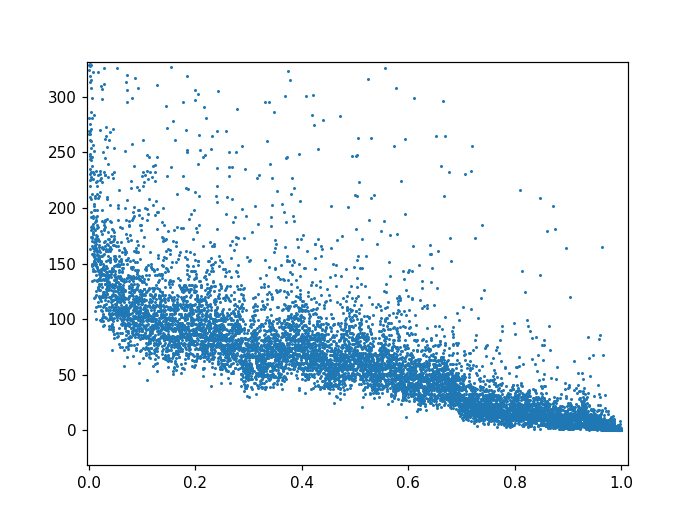

In [57]:
fig = pylab.figure()
axes = pylab.axis()
X=np.arange(CountLayer)*DeltaX
Y=NInLayer
#print(X,'\n', Y) 
pylab.scatter(X,Y,s=1)
pylab.show()

<IPython.core.display.Javascript object>


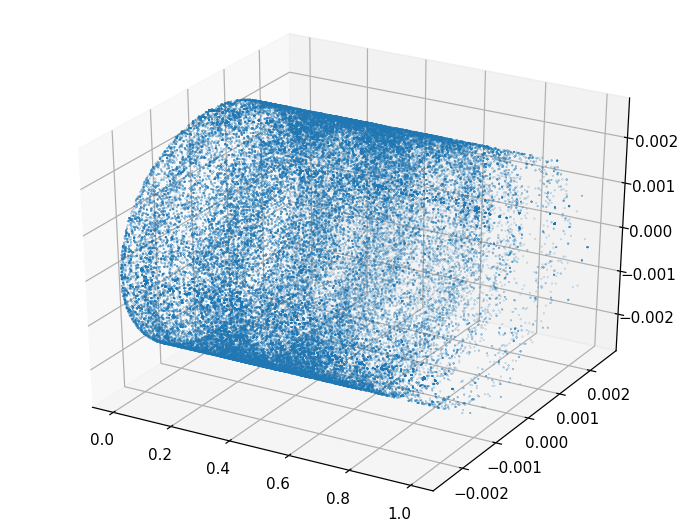

In [22]:
DrawCollision(AllCorp,0.05)

In [ ]:
CountCadre=1000
Animation=Film(AllCorp,CountCadre)
print(AllCorp[-1][0][7])

In [ ]:
fig = pylab.figure()

i=0
ax=Axes3D(fig)
Anim(950,Animation)

#animat=animation.FuncAnimation(fig, Anim , frames=np.arange(100),fargs = Animation, interval=50, blit=False)
pylab.show()

In [ ]:
print(CountCorpuscule)
   

In [ ]:
x,y,z=StopCadre(AllCorp,3e-3)
Cadre = pylab.figure()
axes = Axes3D(Cadre)   
axes.scatter(x, y, z,s=1)
pylab.show()


In [ ]:
AllCountStage=0
FullT=0
FullT2=0
for Corp in AllCorp:
    for Stage in Corp[1:-1]:
        FullT=FullT+Stage[6]*V1
        FullT2=FullT2+(Stage[6]*V1)**2
        AllCountStage=AllCountStage+1
print(np.sqrt(FullT2/AllCountStage-(FullT/AllCountStage)**2))        

In [ ]:
np.sqrt(N)/tN1

In [ ]:
x=[]; y=[]; z=[];
for Corp in AllCorp:
    x.append(Corp[-1][3])
    y.append(Corp[-1][4])
    z.append(Corp[-1][5])
fig = pylab.figure()
axes = Axes3D(fig)   
axes.scatter(x, y, z,s=1)
#pylab.xlim(-1, 1)
#pylab.ylim(-1, 1)
pylab.show()

In [19]:
AllCountStage=0
for Corp in AllCorp:
    AllCountStage=AllCountStage+len(Corp)
print(AllCountStage)

116420


In [34]:
int(34.5//2)

17